In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv(r'C:\Users\lenovo\Downloads\DS_Practice\House-Price-Prediction-MachineHack\Data\Train.csv')
df_test = pd.read_csv(r'C:\Users\lenovo\Downloads\DS_Practice\House-Price-Prediction-MachineHack\Data\Test.csv')

In [4]:
df_train.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [5]:
df_test.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 624.4+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     1480 non-null   object 
 1   availability  1480 non-null   object 
 2   location      1480 non-null   object 
 3   size          1478 non-null   object 
 4   society       854 non-null    object 
 5   total_sqft    1480 non-null   object 
 6   bath          1473 non-null   float64
 7   balcony       1411 non-null   float64
 8   price         0 non-null      float64
dtypes: float64(3), object(6)
memory usage: 69.4+ KB


#### Calculate null values in train dataframe column wise.

In [9]:
df_train.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

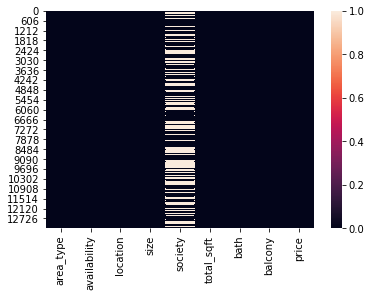

In [26]:
## Graphical representation of count of null values in train dataframe.
sns.heatmap(df_train.isnull())
plt.show()

In [10]:
missing_values = df_train.isnull().sum()
missing_values

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

#### Find percentage of data which is missing.

In [11]:
total_cells = np.product(df_train.shape)
total_missing = missing_values.sum()

percent_missing = (total_missing/total_cells)*100
percent_missing

5.172672672672673

#### Find sum of null values in test dataframe.

In [14]:
df_test.isnull().sum()

area_type          0
availability       0
location           0
size               2
society          626
total_sqft         0
bath               7
balcony           69
price           1480
dtype: int64

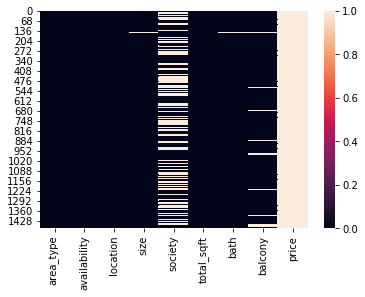

In [13]:
## Graphical representation of count of null values in test dataframe.

sns.heatmap(df_test.isnull())
plt.show()

In [12]:
## df_train['balcony'].fillna('Not Available', inplace='True')
# Evaluation :- np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean())

### Find correlation between columns in train dataframe.

In [15]:
## Check number of variable available under numerical_data
numerical_data = df_train.select_dtypes(exclude = [object])

In [18]:
## Correltaion between numerical variables
corr_matrix = numerical_data.corr()
corr_matrix

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


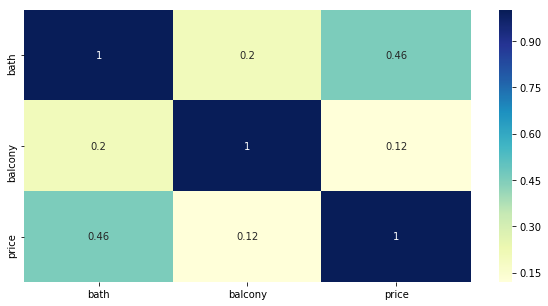

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.show()

### Aanalysis of house 'price' through graphs.

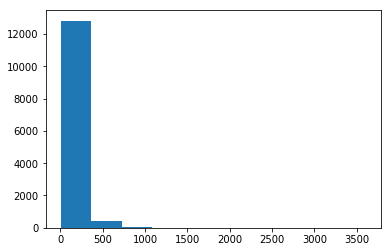

In [21]:
plt.hist(df_train['price'])
plt.show()

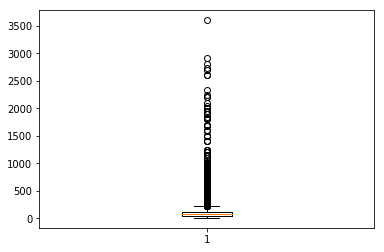

In [22]:
plt.boxplot(df_train['price'])
plt.show()

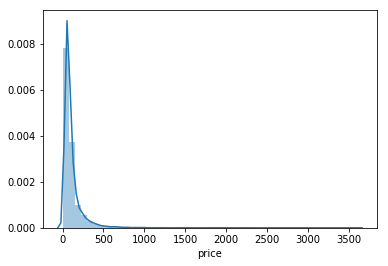

In [25]:
sns.distplot(df_train['price'])
plt.show()

In [29]:
df_train['price'].mean()

112.5656265015015

In [33]:
## Change price value into log value to make clear graph.
log_price = np.log(df_train['price'])

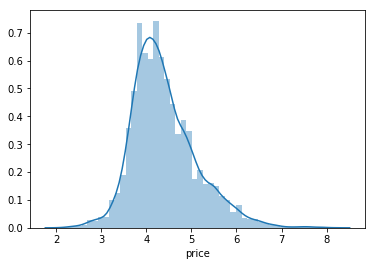

In [36]:
sns.distplot(log_price)
plt.show()

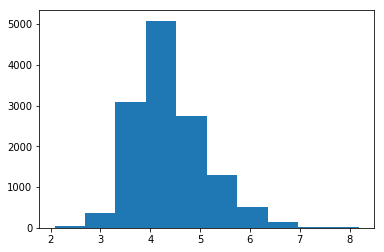

In [37]:
plt.hist(log_price)
plt.show()

### Plot graph between price and total_sqft.